## Project on Exploratory Data Analysis 
# Company - Zomato 
### Submitted by - Abhishek S Sharma
## Univiersity - IIT-Bombay
####          Roll no.                                                          -   205320002

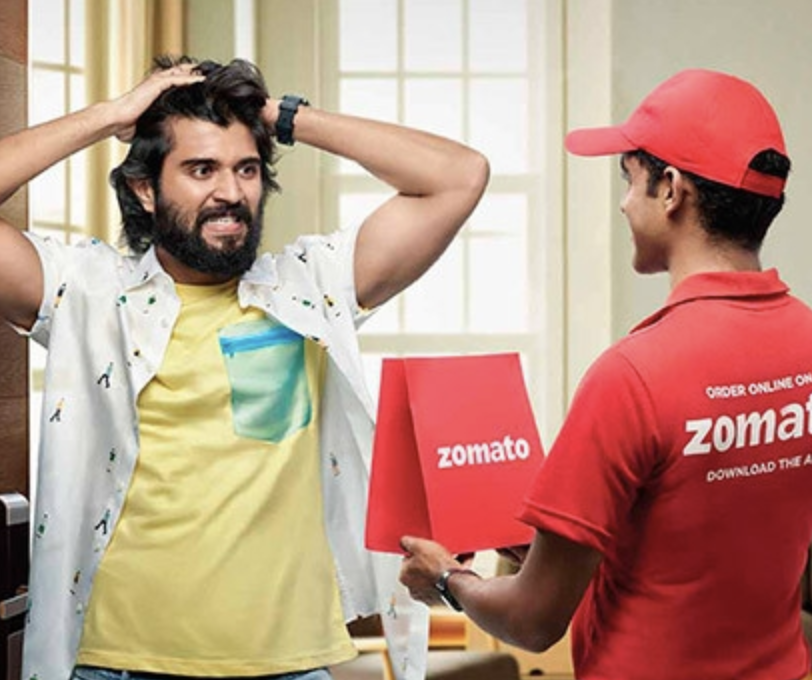

In [183]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [184]:
#reading dataset
df=pd.read_csv('zomato.csv')
df.head()
#information of each column is given on the top

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [185]:
df.shape

(51717, 17)

In [186]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [187]:
#number of unique resteraunt
len(df['name'].unique())

8792

In [188]:
#empty values
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [189]:
#getting the na values

In [190]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [191]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [192]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [193]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [194]:
df.shape

(43942, 17)

In [195]:
def split(x):
    return x.split('/')[0]

In [196]:
df['rate']=df['rate'].apply(split)

In [197]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [198]:
df.replace('NEW',0,inplace=True)
df.replace('-',0,inplace=True)
df['rate']=df['rate'].astype(float)

### Calculating average rating of each resturant

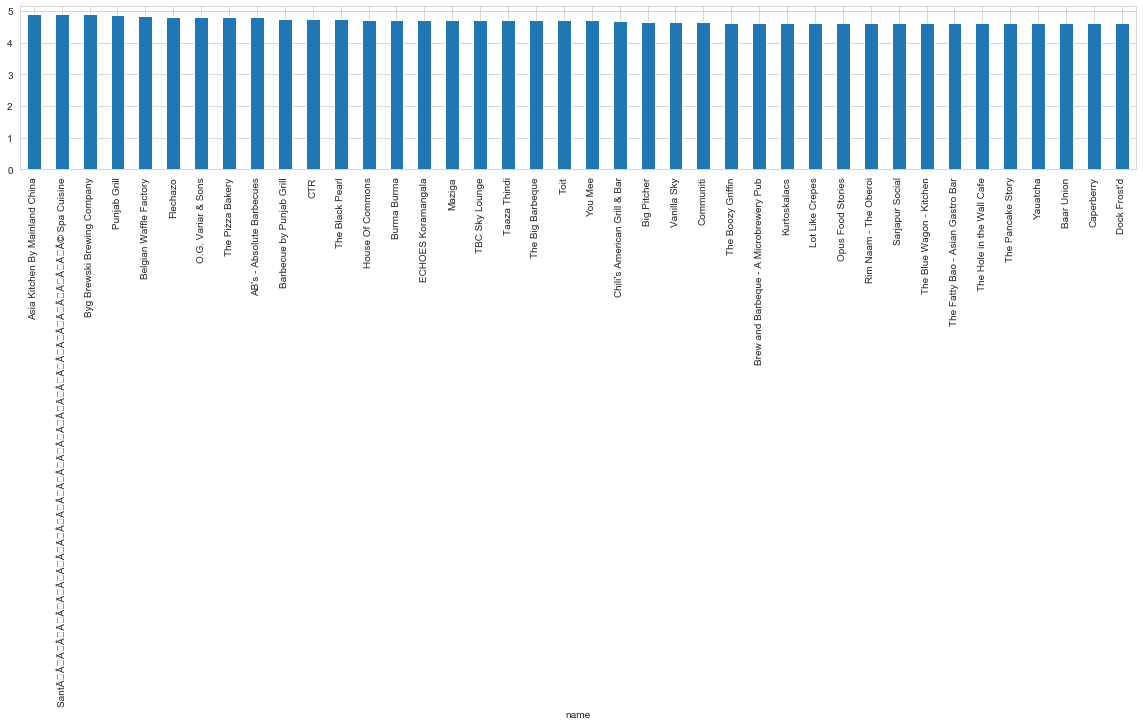

In [199]:
plt.figure(figsize=(20,3))
df.groupby('name')['rate'].mean().nlargest(40).plot.bar()
plt.show()

In [200]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(20)

restaurant    rating
0                           #FeelTheROLL  3.400000
1                             #L-81 Cafe  3.900000
2                                #refuel  3.700000
3                               1000 B.C  3.200000
4   100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.700000
5             11 to 11 Express Biriyanis  3.500000
6                     1131 Bar + Kitchen  4.500000
7              12th Main - Grand Mercure  4.100000
8                          1441 Pizzeria  4.100000
9                         1522 - The Pub  4.212000
10                    154 Breakfast Club  4.000000
11                     1722 Urban Bistro  4.100000
12                          18+ Ice Cafe  3.500000
13                                  1947  4.021429
14                      1980s Games Cafe  3.400000
15                    1992 Chats - Space  3.700000
16                                   1Q1  4.300000
17                          1TO3 Kitchen  3.100000
18                              2 Statez  3.700000
19         20 Char - Sterlings MAC Hotel  4.000000

In [201]:
df_rate.sort_values(by=['rating'],ascending=False)
df_new=df_rate[df_rate['rating']>4.5]
df_new.shape
df_new=df_new.sort_values(by=['rating'],ascending=False)

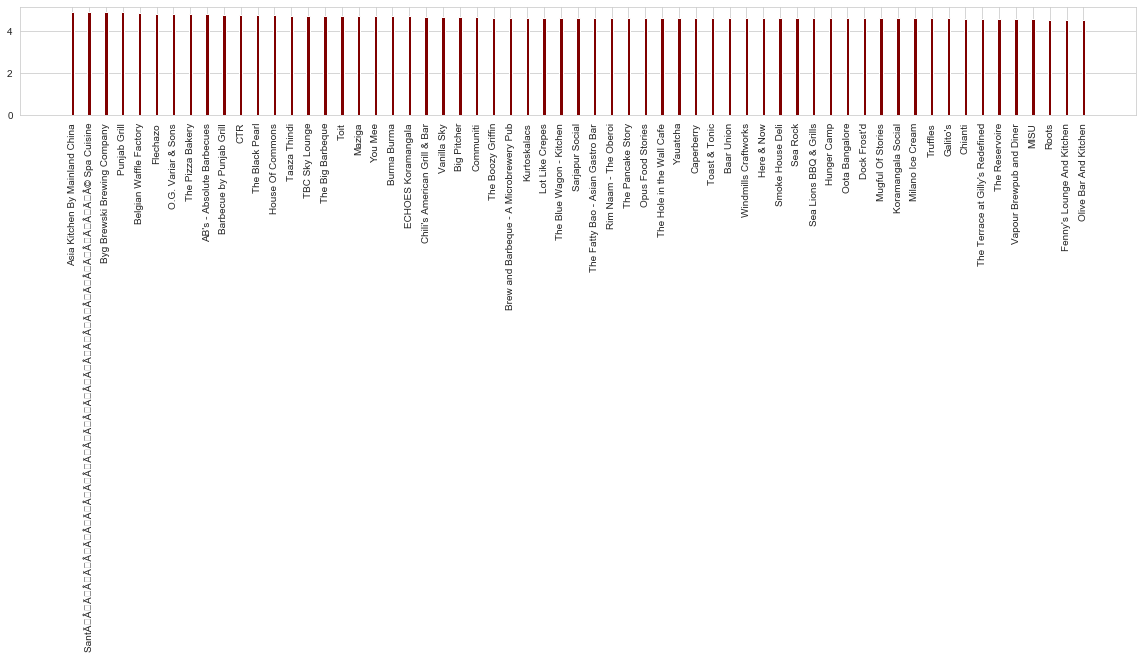

In [202]:
#plotting the maximum values
plt.figure(figsize=(20,2))
plt.bar(df_new['restaurant'],df_new['rating'], color ='maroon',
        width =0.2)
plt.xticks(rotation=90)
plt.show()

### Rating distribution

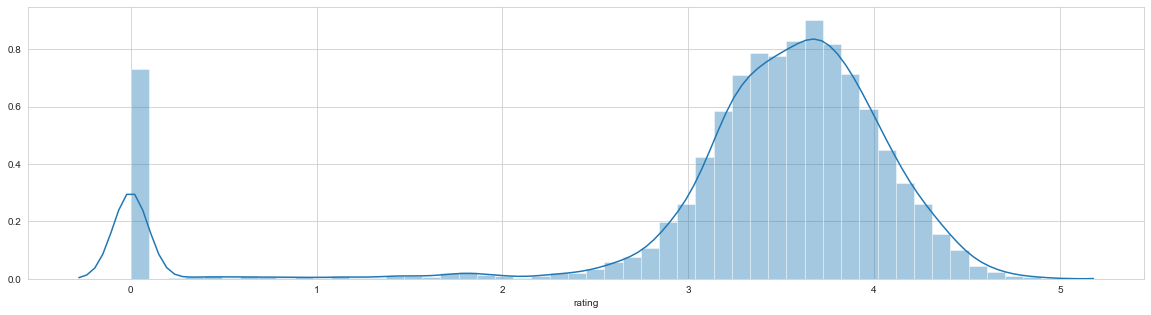

In [203]:
plt.figure(figsize=(20,5))
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])
plt.show()

##### Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

In [204]:
df_45=df_new[df_new['rating']>4.5]
df_45

restaurant    rating
469                      Asia Kitchen By Mainland China  4.900000
5345  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...  4.900000
1037                        Byg Brewski Brewing Company  4.900000
4858                                       Punjab Grill  4.871429
690                              Belgian Waffle Factory  4.844828
...                                                 ...       ...
6873                           Vapour Brewpub and Diner  4.540000
3696                                               MISU  4.536842
5116                                              Roots  4.533333
2107                         Fenny's Lounge And Kitchen  4.521429
4510                              Olive Bar And Kitchen  4.520000

[61 rows x 2 columns]

### Which are the top restaurant franchise in Bangaluru?

Text(0.5, 0, 'Number of outlets')

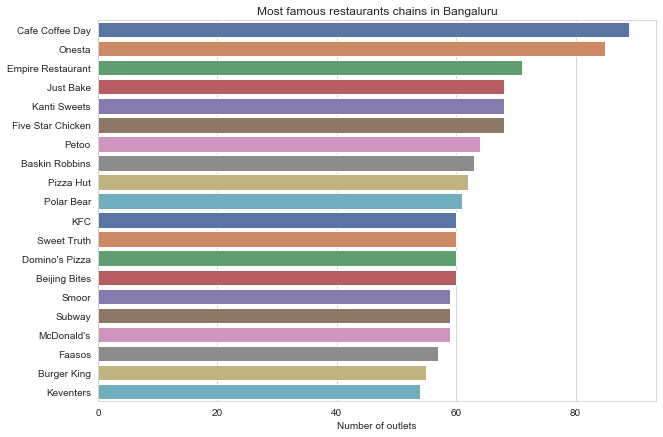

In [205]:
plt.figure(figsize=(10,7))
rest=df['name'].value_counts()[0:20]
sns.barplot(x=rest,y=rest.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

#### How many of the restuarants do not accept online orders?

In [206]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [207]:
import plotly.express as px
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

#### What is the ratio b/w restaurants that provide and do not provide table booking ?

#### How many types of restaurants we have?

In [208]:
df['rest_type'].isna().sum()

151

In [209]:
df['rest_type'].dropna(inplace=True)

In [210]:
df['rest_type'].isna().sum()

0

In [211]:
len(df['rest_type'].unique())

87

In [212]:
import plotly.graph_objs as go
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')

In [213]:
from plotly.offline import iplot
iplot([trace1])

##### At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
##### We can observe tha Quick Bites type restaurants dominates.

#### Highest voted restaurant

In [214]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')

In [215]:
iplot([trace1])

### Total restaurants at different locations of Bengalore

In [216]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [217]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [218]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

restaurant
location                     
Bellandur                 284
Jayanagar                 311
Bannerghatta Road         362
JP Nagar                  400
Indiranagar               467
Electronic City           518
Marathahalli              525
HSR                       553
BTM                       581
Whitefield                634

In [219]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [220]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [221]:
iplot([trace1])

In [222]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Total number of variety of restaurants 

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

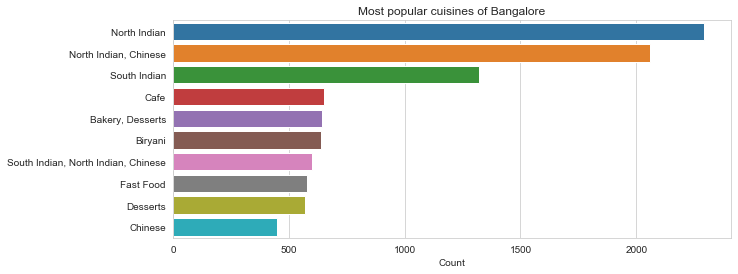

In [223]:
plt.figure(figsize=(10,4))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [224]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar( 
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')

In [225]:
iplot([trace1])

### We can clearly observe that North Indian,chinese,South Indian dominates the chart.
### It means Bengalore is more influenced by North Indian culture more than South!!

### Analyse Approx cost for 2 people

In [226]:
len(df['approx_cost(for two people)'].value_counts())
df['approx_cost(for two people)'].isna().sum()
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)
df['approx_cost(for two people)'].isna().sum()
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [227]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [228]:
df[~df['approx_cost(for two people)'].apply(is_float)]

url  \
67     https://www.zomato.com/gustoesbeerhouse?contex...   
119    https://www.zomato.com/bangalore/k27-the-pub-b...   
166    https://www.zomato.com/bangalore/patio-805-jay...   
207    https://www.zomato.com/bangalore/chutney-chang...   
217    https://www.zomato.com/bangalore/toscano-jayan...   
...                                                  ...   
51707  https://www.zomato.com/bangalore/m-bar-bengalu...   
51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
67     10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...   
119    27, 27th Cross, 2nd Stage, Banashankari, Banga...   
166    805, Ground Floor, 35C Cross, 9th Main, 4th Bl...   
207    Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...   
217    359/38,Next to Fabindia, 7th Cross, 1st Block,...   
...                                                  ...   
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
67                                    Gustoes Beer House           No   
119                                        K27 - The Pub           No   
166                                            Patio 805          Yes   
207                                        Chutney Chang          Yes   
217                                              Toscano          Yes   
...                                                  ...          ...   
51707        M Bar - Bengaluru Marriott Hotel Whitefield           No   
51708                             Keys Cafe - Keys Hotel           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                           phone  \
67            No   4.1    868                    080 49653521   
119           No   3.1     30                  +91 9980097472   
166          Yes   4.1    364                  +91 8884999805   
207          Yes   4.1   2339  080 22443007\r\n+91 9901967373   
217          Yes   4.3   1129  080 41558423\r\n+91 7619320074   
...          ...   ...    ...                             ...   
51707         No   3.9     77                    080 49435000   
51708         No   2.8    161    080 39451000\n+91 8884038484   
51712         No   3.6     27                    080 40301477   
51715        Yes   4.3    236                    080 49652769   
51716         No   3.4     13                  +91 8071117272   

                         location           rest_type  \
67                   Banashankari                 Pub   
119                  Banashankari                 Bar   
166                     Jayanagar       Casual Dining   
207                     Jayanagar       Casual Dining   
217                     Jayanagar       Casual Dining   
...                           ...                 ...   
51707                  Whitefield    Fine Dining, Bar   
51708                  Whitefield  Casual Dining, Bar   
51712                  Whitefield                 Bar   
51715  ITPL Main Road, Whitefield                 Bar   
51716  ITPL Main Road, Whitefield  Bar, Casual Dining   

                                              dish_liked  \
67     Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...   
119                                                  NaN   
166    Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...   
207    Veg Momos, Brownie Ch

In [229]:
df['approx_cost(for two people)'].dtype
df['approx_cost(for two people)']
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

## Cost vs Rating

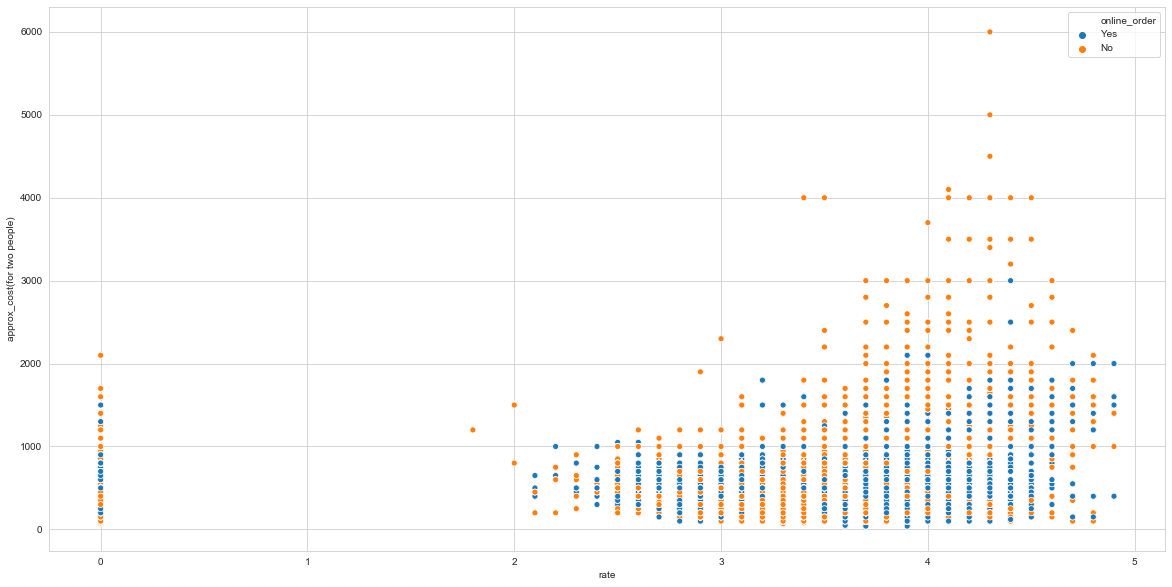

In [230]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

### From this scattterplot we can conclude that most of the highest rated restaurants accepts online order

#### Q- Is there any difference b/w price of restaurants accepting and not accepting online orders?

In [231]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)',notched=True)
fig.show()

#### We can clearly see by the box plot that the restaurants accepting online orders are more affordable than restaurants who are accepting online orders

### Cheapest Rate for 2 people

In [232]:
df['approx_cost(for two people)'].min()

40

##### Distribution of cost for 2 people

In [233]:
plt.figure(figsize=(6,6))
px.histogram(df,x='approx_cost(for two people)')

<Figure size 432x432 with 0 Axes>

### Q- Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant?

In [234]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [235]:
my_data=df.copy()

In [236]:
my_data.set_index('name',inplace=True)

In [237]:
trace1 = go.Bar( 
        x = my_data['approx_cost(for two people)'].nlargest(10).index,
        y = my_data['approx_cost(for two people)'].nlargest(10),
        name= 'Priority')
iplot([trace1])

### These are the most expensive restaraunt 

### Top 10 Cheapest restaurant with approx cost for 2 people

In [238]:
trace1 = go.Bar( 
        x = my_data['approx_cost(for two people)'].nsmallest(10).index,
        y = my_data['approx_cost(for two people)'].nsmallest(10),
        name= 'Priority')
iplot([trace1])

#### We can see Srinidhi Sagar come amongst the cheapest restaraunts

### Restautants that are below than 500(budget hotel)

In [239]:
my_data[my_data['approx_cost(for two people)']<=500]

url  \
name                                                                                                    
Addhuri Udupi Bhojana                               https://www.zomato.com/bangalore/addhuri-udupi...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
The Coffee Shack                                    https://www.zomato.com/bangalore/the-coffee-sh...   
Caf-Eleven                                          https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                                            https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                                                               ...   
Venice Kerala Restaurant                            https://www.zomato.com/bangalore/venice-kerala...   
Thai & Chinese Fast Food                            https://www.zomato.com/bangalore/thai-chinese-...   
The Crunch                                          https://www.zomato.com/bangalore/the-crunch-br...   
Punjabi Charchay                                    https://www.zomato.com/bangalore/punjabi-charc...   
Raapchick                                           https://www.zomato.com/bangalore/raapchick-bro...   

                                                                                              address  \
name                                                                                                    
Addhuri Udupi Bhojana                               1st Floor, Annakuteera, 3rd Stage, Banashankar...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  12,29 Near PES University Back Gate, D'Souza N...   
The Coffee Shack                                        6th Block, 3rd Stage, Banashankari, Bangalore   
Caf-Eleven                                          111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                                            504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
...                                                                                               ...   
Venice Kerala Restaurant                            Opposite Brookfield Mall, Shiva Temple Road, B...   
Thai & Chinese Fast Food                            7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
The Crunch                                            33/1, Kundalahalli Road, Brookefield, Bangalore   
Punjabi Charchay                                    7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
Raapchick                                           Opposite Brookefield Mall, Kundanhalli, Brooke...   

                                                   online_order book_table  \
name                                                                         
Addhuri Udupi Bhojana                                        No         No   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley          Yes         No   
The Coffee Shack                                            Yes        Yes   
Caf-Eleven                                                   No         No   
T3H Cafe                                                     No         No   
...                                                         ...        ...   
Venice Kerala Restaurant                                     No         No   
Thai & Chinese Fast Food                                     No         No   
The Crunch                                                   No         No   
Punjabi Charchay                                             No         No   
Raapchick                                                   Yes         No   

                                                    rate  votes  \
name                                                              
Addhuri Udupi Bhojana                                3.7     88   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley   4.1    402   
The Coffee Shack                                     4.2    164   
Caf-Eleven      

### Total no. of Restaurants that have better rating >4 and that are under budget too ie less than 500

In [240]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

### Total such various  affordable hotels at different location

In [241]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [242]:
len(location)
len(total)

68

In [243]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [244]:
location_df.head(20)

restaurant
location                      
BTM                         54
Banashankari                25
Banaswadi                    3
Bannerghatta Road           19
Basavanagudi                31
Basaveshwara Nagar           3
Bellandur                   20
Brigade Road                11
Brookefield                 16
Church Street                8
City Market                  1
Commercial Street            4
Cunningham Road              4
Domlur                       5
Ejipura                      1
Electronic City             23
Frazer Town                 15
HBR Layout                   3
HSR                         58
Hebbal                       1

In [245]:
trace1 = go.Bar( 
        x = location_df['restaurant'].nlargest(10).index,
        y = location_df['restaurant'].nlargest(10),
        name= 'Priority')
iplot([trace1])

## Geographical analysis

#### For fetching latitudes & longitudes for each restaraunts we can use Geopy

In [246]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [247]:
from geopy.geocoders import Nominatim

In [248]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [249]:
locations['geo_loc']=lat_lon

In [250]:
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.3872141, 76.6669626)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [251]:
locations.to_csv('zomato_locations.csv',index=False)

##### We have found out latitude and longitude of each location listed in the dataset using geopy.
##### This is used to plot maps.

In [252]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [253]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [254]:
Rest_locations.shape

(92, 2)

In [255]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

Name  count                             geo_loc
0                    BTM   4237  (45.95485055, -112.49659530324134)
1  Koramangala 5th Block   2358             (12.9343774, 77.628415)
2                    HSR   2113                (18.1475, 41.538889)
3            Indiranagar   1892            (12.9732913, 77.6404672)
4               JP Nagar   1849            (12.2655944, 76.6465404)

In [256]:
Restaurant_locations['count'].max()

4237

In [257]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [258]:
len(Restaurant_locations['geo_loc'])

91

In [259]:
Restaurant_locations.isna().sum()

Name       0
count      0
geo_loc    0
dtype: int64

In [260]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9343774, 77.628415),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.887979, 77.5970812), (12.9400321, 77.6203272),
       (12.9302645, 77.6332585), (40.28745, -76.964526),
       (12.93577245, 77.66676103753434), (14.5395813, 121.070371),
       (-6.2659285, 106.7842561), (12.9242381, 77.6289059),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (29.4534927, -98.6440138), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (50.7721586, 0.09772783661369303),
       (38.7385916, -77.5275749), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7115227, -74.01043),
       (13.0093455, 77.6377094), (13.0346384, 77.5681733),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338

In [261]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [262]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [263]:
basemap

In [264]:
#Restaurant_locations[['lat','lon','count']].values.tolist()
Restaurant_locations['lat']=np.zeros([len(Restaurant_locations['geo_loc']),1]);
Restaurant_locations['lon']=np.zeros([len(Restaurant_locations['geo_loc']),1]);                                 
for i in np.arange(0,73):
    Restaurant_locations['lat'][i]=Restaurant_locations['geo_loc'][i][0]
    Restaurant_locations['lon'][i]=Restaurant_locations['geo_loc'][i][1]               
for i in np.arange(74,len(Restaurant_locations['geo_loc'])+1):
    Restaurant_locations['lat'][i]=Restaurant_locations['geo_loc'][i][0]
    Restaurant_locations['lon'][i]=Restaurant_locations['geo_loc'][i][1]               


In [265]:
Restaurant_locations['lat'][1]=Restaurant_locations['geo_loc'][1][0]
Restaurant_locations[:]

Name  count                             geo_loc  \
0                     BTM   4237  (45.95485055, -112.49659530324134)   
1   Koramangala 5th Block   2358             (12.9343774, 77.628415)   
2                     HSR   2113                (18.1475, 41.538889)   
3             Indiranagar   1892            (12.9732913, 77.6404672)   
4                JP Nagar   1849            (12.2655944, 76.6465404)   
..                    ...    ...                                 ...   
87         West Bangalore      5            (13.0011289, 77.6325617)   
88              Yelahanka      4            (13.1006982, 77.5963454)   
89   Rajarajeshwari Nagar      2            (12.9274413, 77.5155224)   
90                 Peenya      1            (13.0329419, 77.5273253)   
91             Nagarbhavi      1            (12.9546741, 77.5121724)   

          lat         lon  
0   45.954851 -112.496595  
1   12.934377   77.628415  
2   18.147500   41.538889  
3   12.973291   77.640467  
4   12.265594   76.646540  
..        ...         ...  
87  13.001129   77.632562  
88  13.100698   77.596345  
89  12.927441   77.515522  
90  13.032942   77.527325  
91  12.954674   77.512172  

[91 rows x 5 columns]

In [266]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [267]:
basemap

##### It is clear that restaurants tend to concentrate in central bangalore area.
##### So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

### Heatmap of North Indian restaurants

In [268]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [269]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [270]:
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM    262
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [271]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [272]:
north_india.head()

Name  count                             geo_loc
0                BTM    262  (45.95485055, -112.49659530324134)
1       Banashankari     35            (15.8876779, 75.7046777)
2          Banaswadi      9            (13.0141618, 77.6518539)
3  Bannerghatta Road     60             (12.887979, 77.5970812)
4       Basavanagudi     17            (12.9417261, 77.5755021)

In [273]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)


In [274]:
north_india.drop(['geo_loc'],axis=1)

Name  count        lan         lon
0                             BTM    262  45.954851 -112.496595
1                    Banashankari     35  15.887678   75.704678
2                       Banaswadi      9  13.014162   77.651854
3               Bannerghatta Road     60  12.887979   77.597081
4                    Basavanagudi     17  12.941726   77.575502
..                            ...    ...        ...         ...
58  Varthur Main Road, Whitefield      3  12.941466   77.747094
59                  Vasanth Nagar     12  12.988721   77.585169
60                     Whitefield    146  44.373058  -71.611858
61                  Wilson Garden     37  12.948934   77.596827
62                    Yeshwantpur      3  13.023830   77.552921

[63 rows x 4 columns]

In [275]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

#### Wordcloud of dishes liked by cuisines.

In [276]:
from wordcloud import WordCloud

In [277]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [278]:
df['update_dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])

In [279]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  \
0          Buffet    Banashankari   
1          Buffet    Banashankari   
2          Buffet    Banashankari   
3          Buffet    Banashankari   
4          Buffet    Banashankari   

                                   update_dish_liked  
0  [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...  
1  [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...  
2  [Churros,  Cannelloni,  Minestrone Soup,  Hot ...  
3                                      [Masala Dosa]  
4                             [Panipuri,  Gol Gappe]

In [280]:
df['rest_type'].value_counts()[:9].index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop'],
      dtype='object')

In [281]:
rest=df['rest_type'].value_counts()[:9].index

##### Creating wordcloud for each and every restaurant

In [282]:
from wordcloud import WordCloud, STOPWORDS 

In [283]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
update_dish_liked                  0
dtype: int64

In [284]:
df.dropna(axis='index',subset=['rest_type'],inplace=True)

In [285]:
df.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [286]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          213
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
update_dish_liked                0
dtype: int64

##### wordcloud for 1 restaurant

In [287]:
data=df[df['rest_type']=='Quick Bites']

In [288]:
data['dish_liked']

3                                              Masala Dosa
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
40       Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                           Burgers, Fries, Hot Chocolate
                               ...                        
51598                          Potato Fries, Chicken Curry
51601    Rolls, Chicken Tikka Roll, Chicken Bhuna Roll,...
51617                               Coffee, Vada, Mla Dosa
51629                             Fish, Veg Thali, Biryani
51645                                              Burgers
Name: dish_liked, Length: 5269, dtype: object

In [289]:
stopwords=set(STOPWORDS)

(-0.5, 1499.5, 1499.5, -0.5)

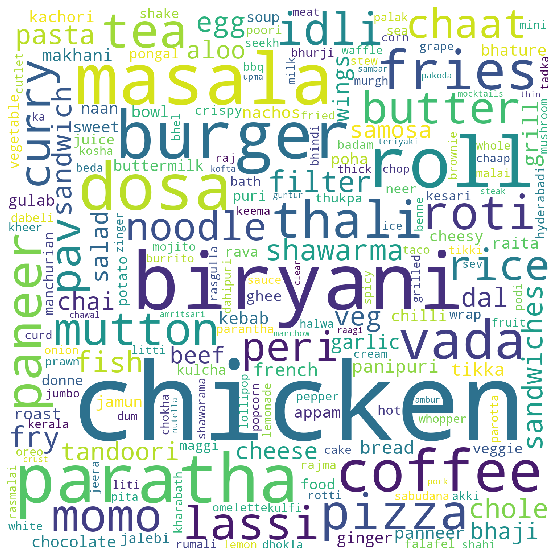

In [290]:
plt.figure(figsize=(100,10))
dishes=''
for word in data['dish_liked']:
    words=word.split()
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
    dishes=dishes+ " ".join(words)+" "
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis("off")

## Thanks
# Abhishek
# 205320002@iitb.ac.in